# CS229, Fall 2017
## Problem Set 3: Deep Learning & Unsupervised Learning
### 5. K-means for compression

#### (a)

In [162]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

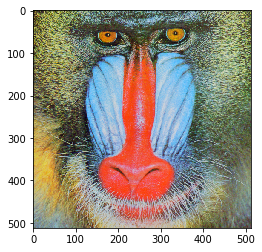

(512, 512, 3)

In [163]:
large_A = imread('mandrill-large.tiff')
# A is now a 3-dim array

plt.imshow(large_A)
plt.show()
large_A.shape

#### (b)

The above image is large, we will run our cluster program on a smaller image!

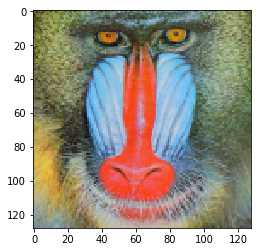

(128, 128, 3)

In [164]:
small_A = imread('mandrill-small.tiff')

plt.imshow(small_A)
plt.show()
small_A.shape

First, we implement the preprocess (flatten the original 3-D array to a 2-D array) and initialization function.

In [165]:
import random

In [166]:
def flat_image(A):
    return A.reshape((-1, 3))

In [167]:
def initial_centroids(A, k):
    # k is the number of clusters we want
    # A is the image data after processing
    num = A.shape[0] # num of training examples
    k_centroids = random.sample(range(0, num), k)
    print('Choosing index of ' + str(k_centroids))
    return A[k_centroids, :].astype(float)

Next, we implement the function that calculates the centroid one example belongs to, the function that calculate the new centroid for each cluster and the function that checks for convergence.

In [168]:
def find_cluster(A, centroids):
    # Return the array of index of the corresponding cluster
    # A is the image data after processing
    cluster = [-1] * A.shape[0]
    for i, pixel in enumerate(A):
        min_value = float('inf')
        min_index = -1
        for j, centroid in enumerate(centroids):
            temp_value = np.linalg.norm(pixel - centroid) ** 2
            if temp_value < min_value:
                min_value = temp_value
                min_index = j
                
        cluster[i] = min_index
        
    return cluster

In [169]:
def find_centroids(A, cluster, old_centroids):
    # Return the new centroids
    # A is the image data after processing
    k = old_centroids.shape[0]
    temp_sum = np.zeros((k, 3))
    temp_num = np.zeros((k, 1))
    for i, pixel in enumerate(A):
        temp_sum[cluster[i]] += pixel
        temp_num[cluster[i]] += 1
    new_centroids = np.zeros(old_centroids.shape)
    for i in range(k):
        new_centroids[i] = temp_sum[i] / temp_num[i]
    
    return new_centroids

In [170]:
def cal_error(A, centroids, cluster):
    # A is the image data after processing
    # Return the error calculated
    error = 0
    for i, pixel in enumerate(A):
        error += np.linalg.norm(pixel - centroids[cluster[i]]) ** 2
    return error

In [171]:
def is_convergent(count, threshold):
    if (count < threshold):
        return True
    else:
        return False

Finally, we group things up!

In [172]:
def k_means(A, k):
    threshold = 50
    count = 0
    centroids = initial_centroids(A, k)
    cluster = []
    error = []
    while is_convergent(count, threshold):
        print('Iteration #' + str(count + 1))
        cluster = find_cluster(A, centroids)
        centroids = find_centroids(A, cluster, centroids)
        count += 1
        error.append(cal_error(A, centroids, cluster))
        
    plt.plot(error)
    return centroids

Choosing index of [2276, 3169, 753, 14969, 11521, 3175, 14272, 1612, 8042, 12182, 9533, 4195, 6919, 3914, 8788, 5368]
Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
[[ 98.2763466  143.29742389 183.65807963]
 [138.04806071 154.18802698 145.68212479]
 [162.84750462 162.37985213 114.48243993]
 [129.34227701 137.43654822 107.33357505]
 [205.275154   168.1745

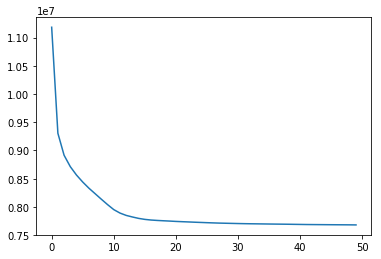

In [173]:
A = flat_image(small_A)
centroids = k_means(A, 16)
print(centroids)

#### (c)

We now take the matrix from file *mandrill-large.tiff* and replace each pixel's value with the value of the closest cluster centroid.

In [174]:
def compress(A, centroids):
    # Return new image matrix
    # A is the image data after processing
    compressed_A = np.zeros(A.shape)
    for i, pixel in enumerate(A):
        new_pixel = np.zeros((1,3))
        distance = float('inf')
        for centroid in centroids:
            temp_distance = np.linalg.norm(centroid - pixel) ** 2
            if temp_distance < distance:
                distance = temp_distance
                new_pixel = centroid
        
        compressed_A[i] = new_pixel
        
    return compressed_A

In [175]:
A = flat_image(large_A)
compressed_A = compress(A, centroids)
compressed_large_A = compressed_A.reshape(large_A.shape).astype(int)

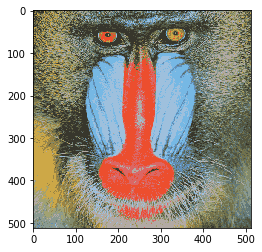

In [176]:
plt.imshow(compressed_large_A)
plt.show()

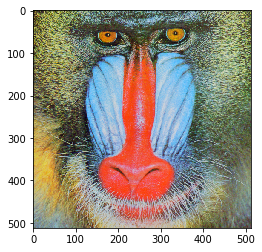

In [177]:
plt.imshow(large_A)
plt.show()

#### (d)

For the original image, we need $8^3$ bits to represent a single color. However, after compression, we only need $4$ bits to represent a color. Therefore, the compression factor is (approximately):
$$
\frac{8^3}{4}=128
$$